## 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.689453,17.987795
std,218.081158,96.759853,1713.600342,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [46]:
# 1. 표본분포의 통계량과 모집단의 통계량 비교를 위한 샘플링 준비.
sample_means = [] # 1000개 표본의 평균값들
n_samples = 1000  # 추출한 표본의 개수
sample_size = 50  # 각 표본의 크기

# 2. 부트스트랩 방식으로 1000번의 표본 추출 시행.
for _ in range(n_samples):

    # 3. 크기가 50인 하나의 표본 추출 후 평균값을 저장. 복원추출.
    sample_mean_50 = np.mean(df['TotalPrice'].sample(n = sample_size, replace = True))

    # 4. 하나의 표본 평균을 리스트에 저장.
    sample_means.append(sample_mean_50)

# 5. sample_means 리스트 안에는 1000 개의 표본의 평균이 들어있음
len(sample_means)

1000

In [48]:
# 6. 표본분포의 통계량 구하기
mean_sampling_dist = sum(sample_means) / len(sample_means) # 표본분포의 평균
std_sampling_dist = (sum((sample_means - mean_sampling_dist) ** 2) / (sample_size - 1)) ** 0.5 # 표본분포의 표준편차(표준오차), 자유도: 50 - 1
mean_sampling_dist, std_sampling_dist

(18.047160400000006, 48.27833378812258)

In [49]:
# 7. 모집단의 평균과 표준편차
mean_population, std_population = df.describe().iloc[1:3, 3]
mean_population, std_population

(17.98779487699964, 378.8108235059747)

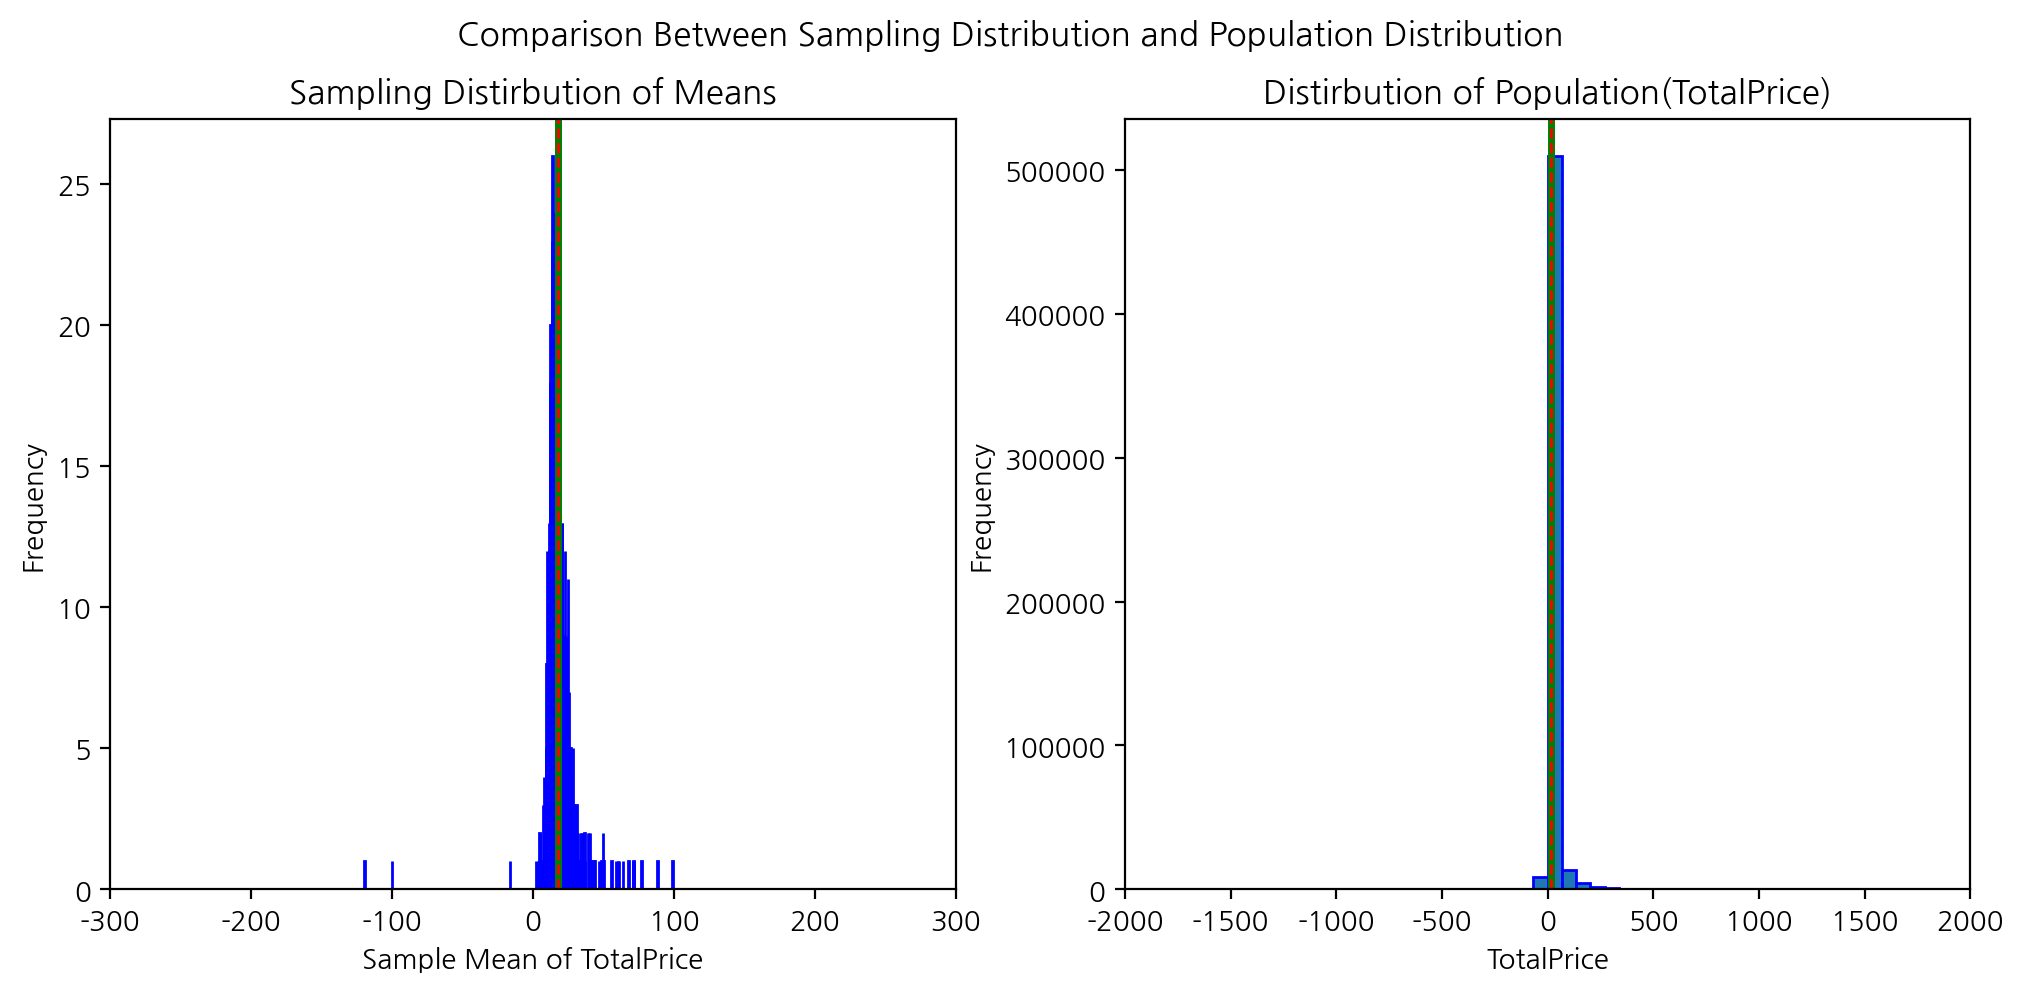

In [50]:
# 8. 표본분포와 모집단의 분포 비교 시각화
plt.figure(figsize=(12, 5))

# 표본분포
plt.subplot(1, 2, 1)
plt.hist(sample_means, bins=1000, edgecolor='blue')
plt.title('Sampling Distirbution of Means')
plt.xlabel('Sample Mean of TotalPrice')
plt.ylabel('Frequency')
plt.axvline(mean_sampling_dist, color='green', linestyle='-', linewidth=2.5)
plt.axvline(mean_population, color='red', linestyle='--', linewidth=1)
plt.xlim(-300, 300)

# 모집단의 TotalPrice 분포
plt.subplot(1, 2, 2)
plt.hist(df['TotalPrice'], bins=5000, edgecolor='blue')
plt.title('Distirbution of Population(TotalPrice)')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.axvline(mean_sampling_dist, color='green', linestyle='-', linewidth=2.5)
plt.axvline(mean_population, color='red', linestyle='--', linewidth=1)
plt.xlim(-2000, 2000)

# 전체 그래프에 대한 제목
plt.suptitle('Comparison Between Sampling Distribution and Population Distribution')

plt.show()

# 미션 1) 해석

1. 중심극한정리에 의하면 표본이 독립적으로 추출되고 크기가 충분히 크면, 표본분포(Sampling Distribution)는 모집단의 평균(μ)과 모집단의 표준편차를 표본크기의 제곱근으로 나눈 값(σ/sqrt(n))을 각각 평균과 표준오차(standard error)로 가지는 정규분포를 따르게 된다.

2. 이에 따라 위 표본분포의 평균 18.04 이 모집단의 평균 18 에 근사함을 알 수 있다.

3. 위 그래프에서 초록색 선은 표본분포의 평균, 빨간색 점선은 모집단의 평균이다. 두 평균의 차이가 눈에 잘 보이지 않을 정도로 근사함을 알 수 있다.

4. 또한 모집단의 표준편차인 378.8 을 표본의 크기 50의 제곱근으로 나누면 53.6 값이 나오는데, 이는 표본분포의 표준편차인 48.3 과 비교적 근사함을 알 수 있다.

5. 한편 표본분포는 약 -100 ~ 100 사이에 데이터가 주로 분포해 있있는 반면, 모집단의 분포는 -500 ~ -500 사이에 좀더 넓게 분포해 있다. 이 차이는 표본분포가 표본의 평균들로 이루어져 있는 값들의 분포이므로, 모집단의 분포에 비해 변동성이 비교적 작게 나온 것으로 설명할 수 있다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [13]:
from scipy import stats

# 문제 해결 회고

국가별 주문 수가 가장 많은 데이터를 계산하면 session 이 파괴되는 현상이 발생하여 TotalPrice 가 가장 많은 두 국가를 기준으로 과제를 수행함.



In [14]:
# 0. 국가별 주문 수가 가장 많은 데이터를 계산

# 아래 두 코드 모두 계산이 불가능하거나 session이 파괴되는 결과가 나타남
# df.groupby('Country').value_counts()
# df.groupby('Country')[['InvoiceNo', 'StockCode']].value_counts()

In [15]:
# 1.  TotalPrice 가 가장 많은 두 국가
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(2)

Country
United Kingdom    8187806.364
Netherlands        284661.540
Name: TotalPrice, dtype: float64

In [16]:
# 2. 두 국가의 평균 TotalPrice

uk = df[df['Country'] == 'United Kingdom']['TotalPrice']
nl = df[df['Country'] == 'Netherlands']['TotalPrice']

total_mean_uk = uk.mean()
total_mean_nl = nl.mean()

print('UK  ', total_mean_uk, '\n', 'Netherlands  ', total_mean_nl)

UK   16.525065419655366 
 Netherlands   120.05969633066216


In [17]:
# 3. t-test 를 통한 두 국가 간의 평균의 차이 가설검정
t_statistic, p_value = stats.ttest_ind(uk, nl, equal_var = False, alternative='two-sided')
t_statistic, p_value

(-30.271869389677317, 8.462075644260513e-172)

# 미션 2) 해석
1. p값이 0 에 근사하므로 영국과 네덜란드의 TotalPrice 평균이 같다는 귀무가설을 기각한다.
2. t 통계량이 약 -30 으로 영국의 평균 TotalPrice 값이 네덜란드의 평균 TotalPrice 값보다 작다는 것을 의미한다.
3. 따라서 대립 가설인 두 국가의 TotalPrice 평균값이 차이가 있음으로 결론을 내린다.
4. 1종 오류는 귀무가설이 참임에도 불구하고 귀무가설을 잘못 기각하는 경우를 의미하고, 2종 오류는 대립가설이 참인데 귀무가설을 기각하는데 실패하는 경우를 의미한다. 1종 오류의 확률은 유의수준과 같고, 2종 오류의 경우 검정력과 반비례 관계에 있다.
5. 위 사례의 경우, 1종 오류는 영국과 네덜란드의 TotalPrice 평균이 모집단에서는 같은데, 표본을 추출하는 과정에서 자연스럽게 발생할 수 있는 변이에 의하여 관측된 데이터와 같은 평균의 차이가 귀무가설을 잘못 기각하는 근거로 사용된 것을 의미한다.
6. 위 사례에서는 귀무가설을 기각하고 대립가설을 채택했으므로, 2종 오류는 해당하지 않는다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [18]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

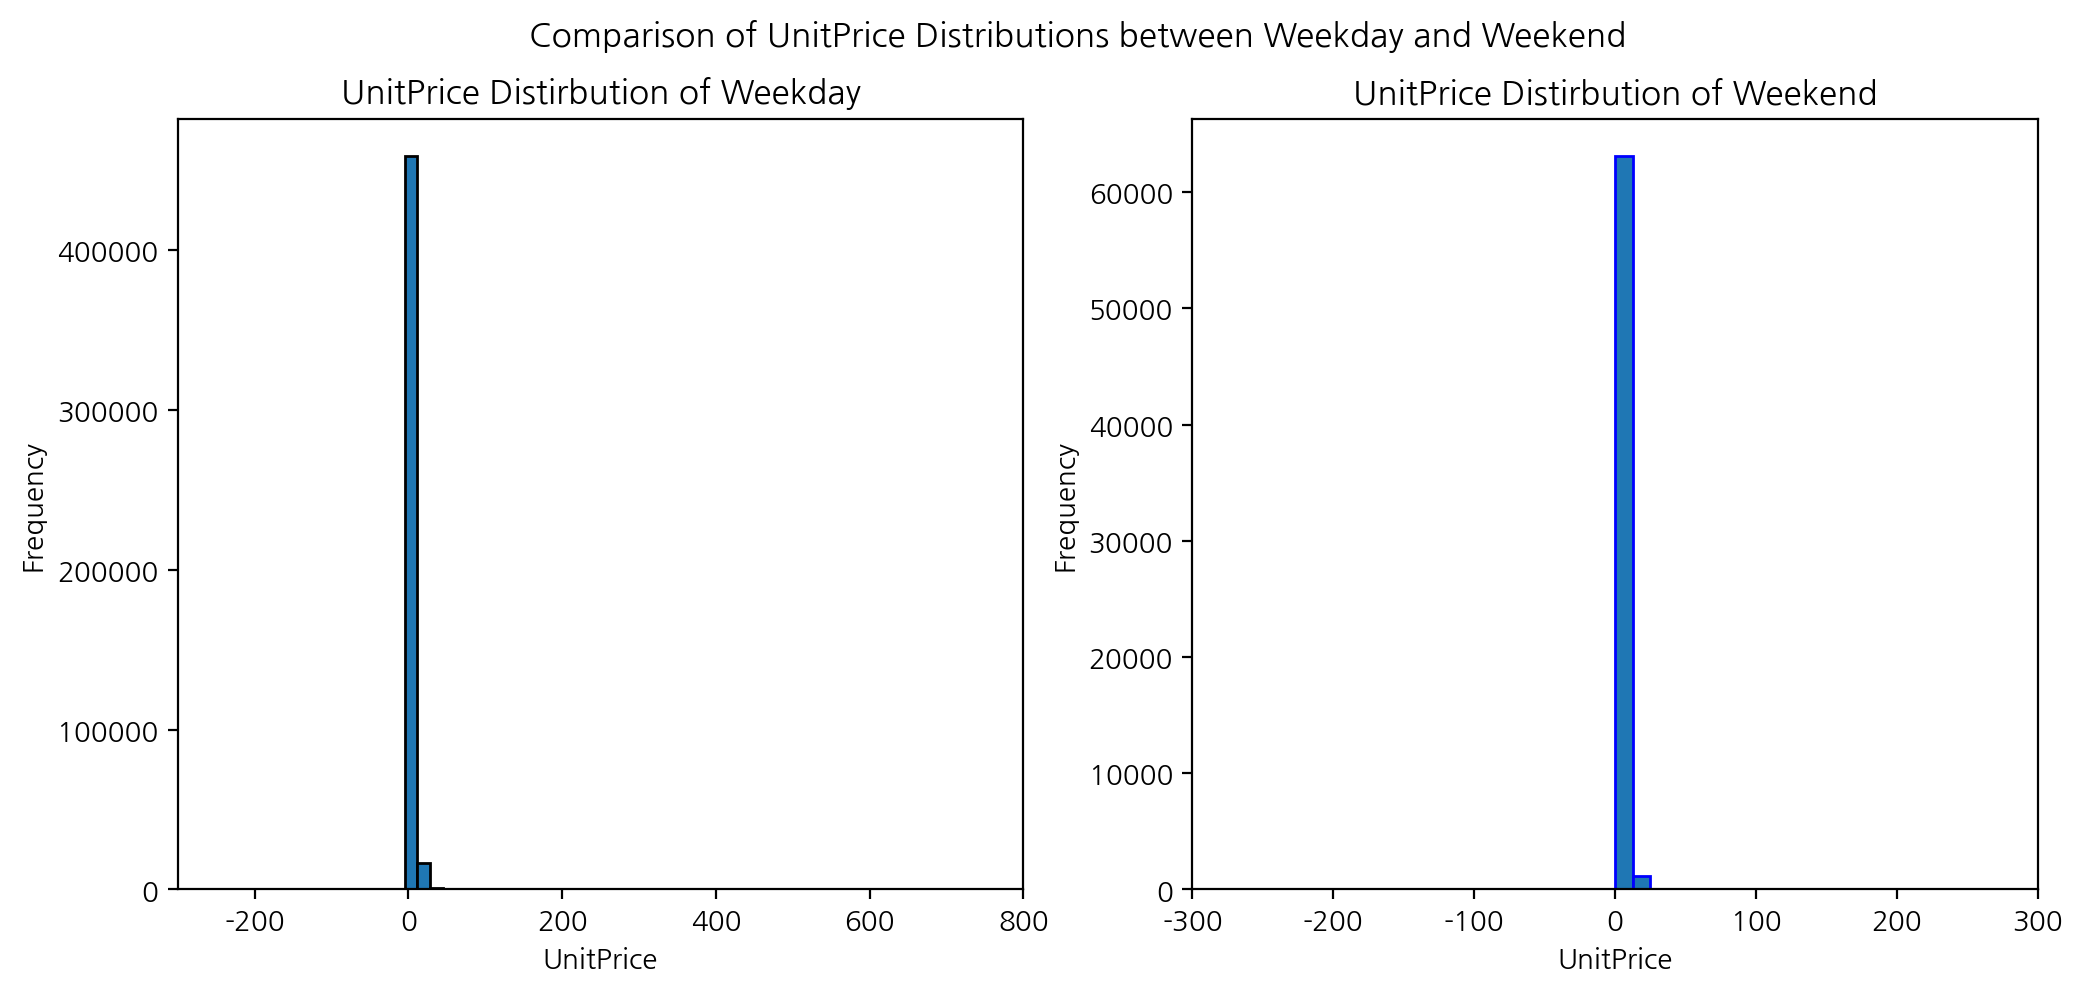

In [19]:
# 1. 주중, 주말 데이터의 UnitPrice 의 분포 시각화
plt.figure(figsize=(12, 5))

# 주중
plt.subplot(1, 2, 1)
plt.hist(weekday_data['UnitPrice'], bins=3000, edgecolor='black')
plt.title('UnitPrice Distirbution of Weekday')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(-300, 800)

# 주말
plt.subplot(1, 2, 2)
plt.hist(weekend_data['UnitPrice'], bins=100, edgecolor='blue')
plt.title('UnitPrice Distirbution of Weekend')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(-300, 300)

# 전체 그래프에 대한 제목
plt.suptitle('Comparison of UnitPrice Distributions between Weekday and Weekend')

plt.show()

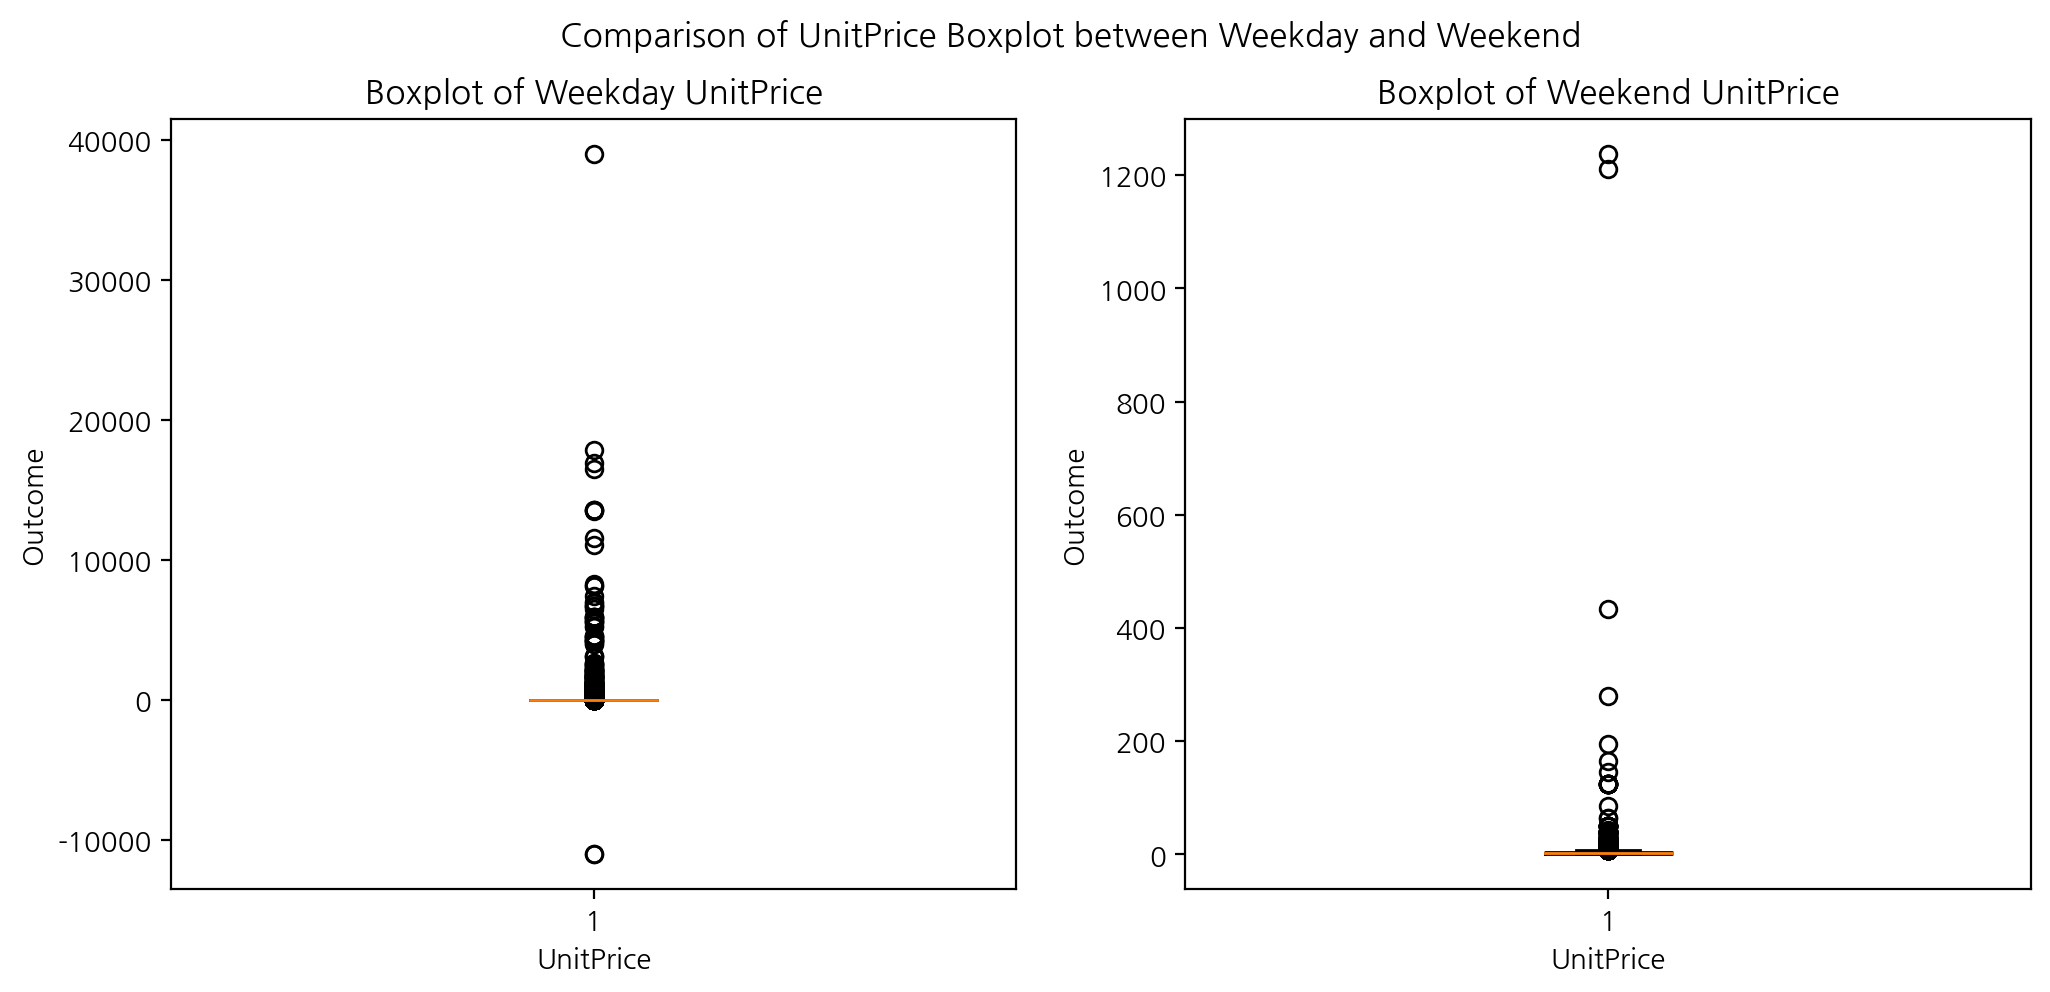

In [20]:
# 2. 상자수염그림으로 주중, 주말 데이터의 UnitPrice 의 분포 시각화
plt.figure(figsize=(12, 5))

# 주중
plt.subplot(1, 2, 1)
plt.boxplot(weekday_data['UnitPrice'])
plt.title('Boxplot of Weekday UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Outcome')

# 주말
plt.subplot(1, 2, 2)
plt.boxplot(weekend_data['UnitPrice'])
plt.title('Boxplot of Weekend UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Outcome')

# 전체 그래프에 대한 제목
plt.suptitle('Comparison of UnitPrice Boxplot between Weekday and Weekend')

plt.show()

In [21]:
# 3. 주중, 주말 데이터의 UnitPrice 통계량
weekday_data.describe()['UnitPrice'], weekend_data.describe()['UnitPrice']

(count    477534.000000
 mean          4.843425
 std         103.032058
 min      -11062.060000
 25%           1.250000
 50%           2.100000
 75%           4.130000
 max       38970.000000
 Name: UnitPrice, dtype: float64,
 count    64375.000000
 mean         2.887824
 std          7.959497
 min          0.000000
 25%          1.250000
 50%          1.850000
 75%          3.750000
 max       1236.750000
 Name: UnitPrice, dtype: float64)

In [51]:
7.96 ** 2

63.3616

# 미션 3) 해석
1. 주중 데이터의 UnitPrice 통계량
- 평균 : 4.84, 표준편차 : 103.03, 분산 : 10615.6
- Q1 : 1.25, 중앙값 : 2.1, Q3 : 4.1


2. 주말 데이터의 UnitPrice 통계량
- 평균 : 2.89, 표준편차 : 7.96, 분산 : 63.36
- Q1 : 1.25, 중앙값 : 1.85, Q3 : 3.75


3. 주중, 주말 데이터 모두 히스토그램보다 상자수염그림이 데이터의 분포를 확인하는데 상대적으로 유용하게 보인다.


4. 주중 데이터의 상자수염그림의 경우 음수값을 확인할 수 있는데, 이는 이벤트성 판매 데이터로 이상치로 분류할 수 있다.


5. 두 데이터 모두 상자수염그림을 보면 0 에 근접한 중간값을 가지고 있고, 범위가 매우 큰 이상치를 확인할 수 있다. 데이터의 분산의 경우 주중 데이터가 주말 데이터보다 상대적으로 더 큰 변동성을 보인다.


6. 두 데이터 모두 상자수염그림을 보면 IQR 이 데이터의 분산에 비해 눈으로 식별되지 않을 정도로 작음을 알 수 있다.


7. 두 데이터 모두 히스토그램을 보면 대부분의 값들이 0보다 살짝 큰 값을 가질 것으로 볼 수 있지만, 상자수염그림을 보면 Q3 + 1.5*IQR 범위를 넘어가는 이상치들이 실제 데이터에 많이 포함되어 있음을 확인할 수 있다.

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [23]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
# df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [24]:
# 1.  TotalPrice 를 비교하기 위한 국가 선정
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64

In [25]:
# 2. 비슷해보이는 Netherlands, EIRE 두 국가 사이의 TotalPrice 의 중간값이 같은지 다른지 검정하기로 결정
nl = df[df['Country'] == 'Netherlands']['TotalPrice']
eire = df[df['Country'] == 'EIRE']['TotalPrice']

In [26]:
# 3. 두 국가의 중앙값 확인
median_nl = nl.median()
median_eire = eire.median()

print('Netherlands  ', median_nl, '\n', 'EIRE  ', median_eire)

Netherlands   91.8 
 EIRE   17.34


In [27]:
# 4. 맨-휘트니 U-검정을 통한 두 국가 간의 중
u_statistic, p_value = stats.mannwhitneyu(nl, eire)
u_statistic, p_value

(15385371.0, 0.0)

# 미션 4) 해석
1. 0 에 근사한 p값 : stats.mannwhitneyu의 설명에 따라 두 표본이 서로 같은 분포에서 추출되었다는 귀무가설을 기각한다.
2. 따라서 대립가설에 의해 두 표본의 중앙값의 차이가 통계적으로 유의미하다고 결론내릴 수 있다.
3. 맨휘트니U 검정은 t-test와 달리 중앙값의 차이를 검정하는 것으로 이상치에 robust하다.
4. 따라서 맨휘트니U 검정에 따른 결과는 네덜란드와 에이레의 TotalPrice 데이터에 이상치가 포함되었을지라도 t-test에 비해 상대적으로 두 그룹의 대다수의 데이터 간에 대표성의 차이를 잘 설명할 수 있다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [28]:
from scipy import stats

In [29]:
df['UnitPrice'].std(ddof=1)

96.75985306117938

In [30]:
# 1. 95% 신뢰수준 설정
confidence_level = 0.95
alpha = 1 - confidence_level

# 2. t-분포의 임계값 및 표준오차 설정
t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # t-분포의 임계값
margin_of_error = t_critical * (df['UnitPrice'].std(ddof=1) / np.sqrt(len(df)))  # UnitPrice 의 표준편차로 모집단 표준편차를 대체, 표본의 크기 설정

# 3. UnitPrice 의 평균을 기준으로 신뢰구간 구하기
mean_estimate = df['UnitPrice'].mean()
confidence_interval = (mean_estimate - margin_of_error, mean_estimate + margin_of_error)

# 4. 결과확인
mean_estimate, confidence_interval

(4.611113626088513, (4.346972339906626, 4.8752549122704005))

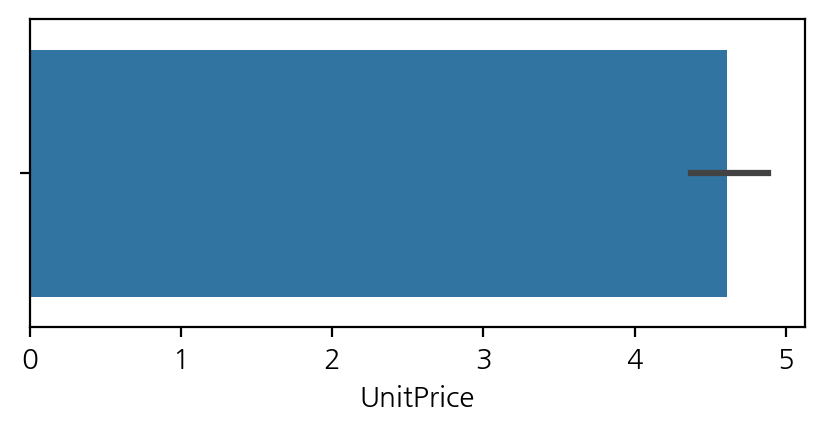

In [31]:
# 5. sns.barplot 으로 UnitPrice 신뢰 구간 확인하기
plt.figure(figsize=(5, 2))
sns.barplot(data=df, x='UnitPrice');

# 미션 5) 해석 및 비즈니스 인사이트 도출
1. UnitPrice 는 판매된 개별 제품 가격이다.
2. 표본 UnitPrice 은 평균 4.61 을 기준으로 95% 신뢰구간 4.35 ~ 4.88 을 가진다.
3. 이는 또 다른 표본을 100번 추출했을 때 약 95개의 표본의 신뢰구간이 모집단의 UnitPrice 의 평균값 포함할 것임을 의미한다.
4. 따라서 이 결과를 통해 우리는 95% 신뢰수준에서, 표본 데이터의 고객들과 유사한 그룹의 전체 소비자들은 4.35 ~ 4.88 사이의 비교적 값이 싼 제품을 평균적으로 주로 구매한다는 소비 패턴을 통계적으로 추론할 수 있다.
5. 이러한 통계적 추론을 바탕으로 생각할 수 있는 비즈니스 전략은 대부분의 대중적 소비자들을 대상으로 값비싼 제품보다 약 4.6 파운드의 가격에 해당하는 제품을 주력으로 판매하여 대중을 공략하는 전략을 세우는 것이다.
6. 또 다른 전략으로 4.6 파운드보다 살짝 비싼 제품을 적당히 할인해서 4.35 ~ 4.88 파운드로 프로모션하여 신규 소비자를 끌어모으는 전략을 생각할 수 있다.